In [1]:
#TobikoSim ckh Aug 2016 calculate the worst case number of contacts for a NxN array of integer-spaced contacts
#touching an interdigitated array of electrodes with thickness t and gap g in units of pin spacing.

#The array can be at any angle and any centroid relative to the electrode strips.
import numpy as np
import matplotlib.pyplot as plt #check my recent work for syntax

N=7 #number of contacts on a side
x=np.linspace(-(float(N-1))/2,(float(N-1))/2,N)
y=x #Pin x-y coordinates are integer-spaced
[X,Y]=np.meshgrid(x,y)#grids of the pin coordinates

In [2]:
#define the coordinate conversions matlab has that numpy doesnt
#and make them work at least on 1-D arrays
def cart2pol(xin, yin):
    #xin and yin must be same length
    phi=np.zeros(len(xin))
    rho=np.zeros(len(xin))
    for i in range(len(xin)):
        rho[i]=np.array(np.sqrt(xin[i]**2+yin[i]**2))
        phi[i]=np.array(np.arctan2(yin[i],xin[i]))
    return(phi,rho)

def pol2cart(phiin, rhoin): #modified to work on 1D arrays
    #phiin and rhoin must be same length
    x=np.zeros(len(phiin))
    y=np.zeros(len(phiin))
    for i in range(len(phiin)):
        x[i] = np.array(rhoin[i] * np.cos(phiin[i]))
        y[i] = np.array(rhoin[i] * np.sin(phiin[i]))
    return(x, y)

In [3]:
theta=np.linspace(0,np.pi/2,45)#rotate thru 90 degrees
thickness=np.linspace(0.1,float(N)/2,20)#thickness can range from a pin width of spacing/10, to half the array width
#gap=thickness #same range for gap values
gap=np.linspace(0.1,float(N)/2,20)

#now put the un-rotated, un-translated XY values into polar
#probably going to run into a stupid problem bc X Y are 2D arrays BLAH!!!
Xflat=X.flatten()#now it's a 1D array at least
Yflat=Y.flatten()#same
#I'll modify my cart2pol and pol2cart to work on 1D arrays.
[TH,R]=cart2pol(Xflat,Yflat)

metric=np.zeros([len(thickness),len(gap)])# populate this array with contact-quality metric in next few lines
for idxt,t in enumerate(thickness):
    for idxg,g in enumerate(gap):
        worstcase=N**2/2#Lowest number of contacts found with either of the two nets.
        #It starts off at the best possible value.
        centroidy=np.linspace(-(g+t),(g+t),50)
        for th in theta:
            [XROT,YROT]=pol2cart(TH+th,R)
            for cy in centroidy:
                YFinal=YROT+cy #final y value array
                #Whether a pin contacts depends on whether the remainder after dividing the contact spacing
                #into the pin's shifted y-value, is within t/2 of the center of the electrode.
                AContacts=np.sum(np.logical_or((np.abs((YFinal+(t+g)/2)%(2*(t+g)))<t/2),(np.abs((YFinal+(t+g)/2)%(-2*(t+g)))<t/2)))#Number of contacts touching A electrodes
                BContacts=np.sum(np.logical_or((np.abs((YFinal-(t+g)/2)%(2*(t+g)))<t/2),(np.abs((YFinal-(t+g)/2)%(-2*(t+g)))<t/2)))#Number of contacts touching B electrodes
                testcase=np.amin([AContacts,BContacts])
                if testcase < worstcase:
                    worstcase=testcase #found a new low
        metric[idxt][idxg]=worstcase
        #Here add the latest worstcase to an array somehow mapped to the t and g value that caused it
        #Later plot worstcase number of pins connected. Somehow. Mesh? Surf? Pcolor was too slow.
metric
                
        
        
    

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  7.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,   7.,   7.,   7.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 14.,  14.,   7.,   0.,   7.,   5.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 16.,  13.,  12.,  10.,   7.,   7.,   6.,   7.,   6.,   6.,   0.,
          5.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 14.,  12.,  14.,   7.,   7.,   7.,   7.,   7.,   7.,   6.,   6.,
          5.,   5.,   4.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 14.,  14.,  12.,   7.,   7.,   7

In [4]:
np.max(metric)

20.0

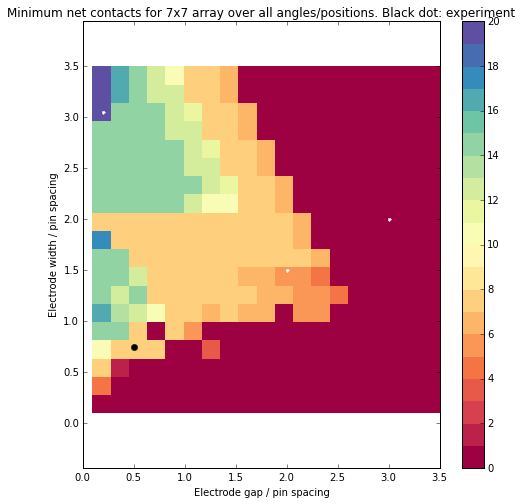

In [6]:

%matplotlib inline

#from pylab import *
#imshow(metric, interpolation='none')#ok that worked but is upside down
from matplotlib import pyplot as plt
from matplotlib import colors as c
f=plt.figure(figsize=(8,8))
#cMap=c.ListedColormap(['r','g','b','m'])#this is one way to color the map
#But there are nice built-in labels and colors
cMap=plt.cm.get_cmap('Spectral',lut=int(np.max(metric)))# lut argument was hard to find out
plt.pcolormesh(gap,thickness,metric,cmap=cMap)#how do I show the color scale
#Have to do better with annotating the axes but how, when it's an image?
#I also want to plot the location of my experiment on this metric.
plt.xlabel('Electrode gap / pin spacing')
plt.ylabel('Electrode width / pin spacing')#I called it thickness instead of width in the code
#However, thickness could be interpreted as thin-film or PCB trace thickness
plt.title('Minimum net contacts for 7x7 array over all angles/positions. Black dot: experiment')
plt.colorbar(orientation='vertical')
plt.hold('True')
plt.plot(0.5,0.75,'ko')
plt.plot(0.2,3.05,'w.')#A point of interest in the blue triangle
plt.plot(2,1.5,'w.')#A point of interest in the schnozz
plt.plot(3,2,'w.')#A point of interest in the red zone
plt.axis('equal')
f.savefig('7x7TobikoWorstCase20x20.pdf')

In [7]:
np.max(metric)#best possible electrode design for this array? does not consider
#that you might want a larger gap to route signals between, and might want more than one
#A or B electrode contacted in case there is a break in the circuit.

20.0

In [ ]:
f=open('GetABetterFileName.csv','w')
f.write(' ')
for g in gap:
    f.write(",%.3f"%g)#write gap values as column labels
f.write("\r\n")
for idxt,t in enumerate(thickness):
    f.write("%.3f"%t)#write thickness values as row labels
    for idxg,g in enumerate(gap):
        f.write(",%3d"%(metric[idxt][idxg]))
    f.write("\r\n")  
f.write("\n")
    